# PHAS2441 Session 7:  Numerical solutions to differential equations

Fahad Chohan
Last updated: 30/01/17

In this session we're going to solve a first-order ordinary differential equation for a low-pass filter of the form

$$ 
\frac{dx}{dt} = f(x,t)
$$

to obtain a solution $x(t)$ over some time interval $t_0 \leq t \leq t_f$. This will be done by using the fourth-order Runge-Kutta method.

As always, we'll start by importing all the modules we need in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image # needed to import a remote image later

Below is an image of a low-pass filter circuit:

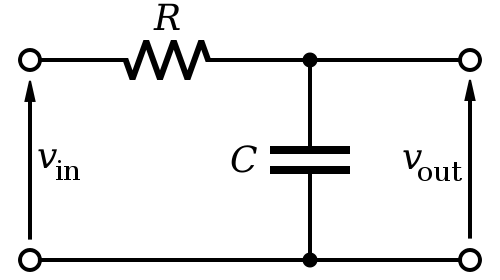

In [2]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/1st_Order_Lowpass_Filter_RC.svg/500px-1st_Order_Lowpass_Filter_RC.svg.png', embed=True)

Let $I$ be the current that flows through the resistor $R$ and into the capacitor $C$, with a charge $Q$ on the capacitor. Then we have

$$
IR = V_{\rm in} - V_{\rm out}, \\
 Q = C V_{\rm out}, \\
 I = \frac{dQ}{dt}.$$

Rearranging this gives us a first-order differential equation:
$$ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}). $$
which is of the form of the differential equation shown above.

Note that $V_{\rm in}$ depends solely on $t$ and so the differential equation is only a function of $V_{\rm out}$ and $t$.

First we need to specify the time-interval we are going to solve for, number of steps and the initial conditions.

In [3]:
t0 = 0.0          # Start of interval
tf = 10.0         # end of interval
N = 100000.0        # number of steps
h = (tf-t0)/N      # size of each step, i.e. delta t

print("Step size h is", h)

Vout = 0.0          # initial condition

tpoints = np.arange(t0,tf,h) # array of time points

print(tpoints)

Step size h is 0.0001
[  0.00000000e+00   1.00000000e-04   2.00000000e-04 ...,   9.99970000e+00
   9.99980000e+00   9.99990000e+00]


# Square-wave input signal:

We will use an input signal that is a square-wave and this is represented by the below equation:

$$ V_{\rm in} = \begin{cases} 1 & \text{if } \lfloor 2t \rfloor\  \text{is even}, \\ 
-1  & \text{if } \lfloor 2t \rfloor\  \text{is odd}, \end{cases} 
$$

In order to use the Runge-Kutta method we will need to define a function for the RHS of the differential equation. 

In [4]:
def fsquare(Vout,t,RC):
    ''' Definition of our numerical function
    Inputs:
    Vout: output signal values from filter
    t: time at which to evaluate the function
    RC: time-constant of circuit
    f(x,t): function evaluated for this Vout and t'''
        
    Vin = (-1.0)**(np.floor(2.0*t)) # this equation determines the value of Vin accordingly to the above conditions
    return (Vin - Vout)/(RC)

In the fourth-order Runge Kutta method, we do a Taylor expansion around $t + \frac{1}{2}h$. Rearranging the results to eliminate terms we can't / don't want to calculate, it's possible to come up with even more accurate (and complicated) algorithms. 

In general, the fourth-order Runge Kutta (i.e. the one with errors ${\rm O}(h^5)$)is considered to have the most useful combination of simplicity and accuracy, and is the most widely used method to solve differential equations numerically.

The equations are:
$$
k_1 = h f(x,t), \\
k_2 = h f(x+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(x+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(x+k_3, t+h), \\
x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$
which we implement in the cell below.

In [5]:
def RungeKutta4square(Vout,tpoints):
    '''Fourth-order Runge Kutta. Inputs: initial Vout, array of t-values
    Also depends on step h (global variable) and
    requires the function f(x,t) to be defined.
    Returns: array of propagated xpoints'''
    xpoints = [] # a new array for the fourth-order results
    
    #for loop for calculating Vout using the Runge-Kutta method for each tpoint
    for t in tpoints:
        xpoints.append(Vout) #appends Vout value to xpoint array
        
        #Runge-Kutta equations, as you can see this recalls the function defined above for the RHS of the differential equation
        k1 = h*fsquare(Vout,t,RC)     
        k2 = h*fsquare(Vout+0.5*k1, t+0.5*h,RC)
        k3 = h*fsquare(Vout+0.5*k2, t+0.5*h,RC)
        k4 = h*fsquare(Vout+k3, t+h,RC)
        
        Vout = Vout + (k1 + 2*k2 + 2*k3 + k4)/6 #calculates Vout value after the next time interval
    return xpoints

Now we will plot the input and output signal below for $RC = 0.01, 0.1$ and $1.0$ 

(-1.1, 1.1)

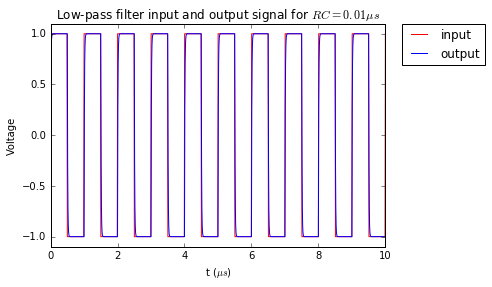

In [6]:
RC = 0.01 #sets value for RC
xpointsRK4 = RungeKutta4square(Vout,tpoints) #calls the Runge-Kutta function for square wave.

#creates an x and y array for input signal so that it can be plotted
t = np.linspace(0,10,1000)
Vin = (-1.0)**(np.floor(2.0*t))

plt.plot(t,Vin,'r-',label="input")
plt.plot(tpoints,xpointsRK4,label="output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("t ($\mu s$)")
plt.ylabel("Voltage")
plt.title("Low-pass filter input and output signal for $RC = 0.01 \mu s$")
plt.ylim(-1.1,1.1) #set higher y limits so graph is more clear

(-1.1, 1.1)

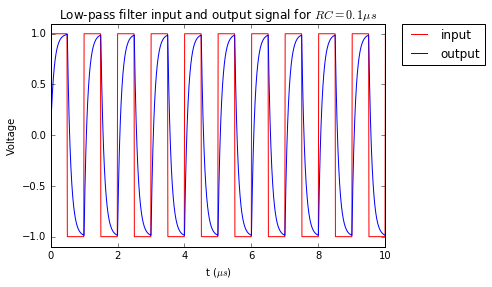

In [7]:
RC = 0.1 #sets value for RC
xpointsRK4 = RungeKutta4square(Vout,tpoints) #calls the Runge-Kutta function for square wave.

#creates an x and y array for input signal so that it can be plotted
t = np.linspace(0,10,1000)
Vin = (-1.0)**(np.floor(2.0*t))

plt.plot(t,Vin,'r-',label="input")
plt.plot(tpoints,xpointsRK4,label="output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("t ($\mu s$)")
plt.ylabel("Voltage")
plt.title("Low-pass filter input and output signal for $RC = 0.1 \mu s$")
plt.ylim(-1.1,1.1) #set higher y limits so graph is more clear

(-1.1, 1.1)

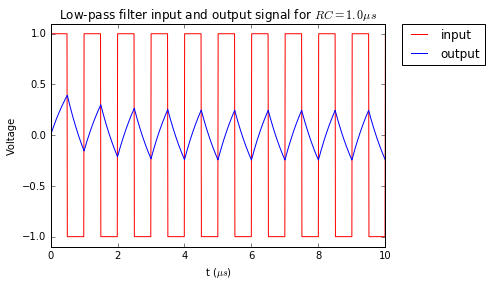

In [8]:
RC = 1.0 #sets value for RC
xpointsRK4 = RungeKutta4square(Vout,tpoints) #calls the Runge-Kutta function for square wave.

#creates an x and y array for input signal so that it can be plotted
t = np.linspace(0,10,1000)
Vin = (-1.0)**(np.floor(2.0*t))

plt.plot(t,Vin,'r-',label="input")
plt.plot(tpoints,xpointsRK4,label="output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("t ($\mu s$)")
plt.ylabel("Voltage")
plt.title("Low-pass filter input and output signal for $RC = 1.0 \mu s$")
plt.ylim(-1.1,1.1) #set higher y limits so graph is more clear

From the graphs you can see that input and output signals are the same until the value of RC is changed. When the RC value is changed the output signals amplitude is decreased.

This may be because the the RC value determines the cap for the maximum frequency allowed through. Therefore as RC is decreased that means less frequencies are let through and so a lower amplitude is the result.

This can be seen in the graphs above as an RC value of 1 has a lower amplitude than RC of value 0.01.

You may also note that the square-wave signal does not keep its square-wave shape after passing through the filter, instead it starts looking like a sine-wave which is cut off at each square boundary.

# Sine-wave input signal:

Now we are going to use an input signal in the form of a sine wave, as seen in the below equation:

$$V_{\rm in} = \sin(2t)$$

To do this we have to redefine the RHS funtion and this is done below.

In [9]:
def fsine(Vout,t,RC):
    '''Definition of our numerical function
    Inputs:
    Vout: output signal values from filter
    t: time at which to evaluate the function
    RC: time-constant of circuit
    f(x,t): function evaluated for this Vout and t'''
        
    Vin = np.sin(2*t) #sine-wave input signal
        
    return (Vin - Vout)/(RC)

And therefore we need to redifine the Runge-Kutta function to recall for the sine-wave input signal instead of the square-wave signal.

In [10]:
def RungeKutta4sine(Vout,tpoints):
    '''Fourth-order Runge Kutta. Inputs: initial Vout, array of t-values
    Also depends on step h (global variable) and
    requires the function f(x,t) to be defined.
    Returns: array of propagated xpoints'''
    xpoints = [] # a new array for the fourth-order results
    
    #for loop for calculating Vout using the Runge-Kutta method for each tpoint
    for t in tpoints:
        xpoints.append(Vout) #appends Vout value to xpoint array
        
        #Runge-Kutta equations, as you can see this recalls the function defined above for the RHS of the differential equation
        k1 = h*fsine(Vout,t,RC)     
        k2 = h*fsine(Vout+0.5*k1, t+0.5*h,RC)
        k3 = h*fsine(Vout+0.5*k2, t+0.5*h,RC)
        k4 = h*fsine(Vout+k3, t+h,RC)
        
        Vout = Vout + (k1 + 2*k2 + 2*k3 + k4)/6 #calculates Vout value after the next time interval
    return xpoints

Again we will plot the input and output signal below for $RC = 0.01, 0.1$ and $1.0$ 

(-1.1, 1.1)

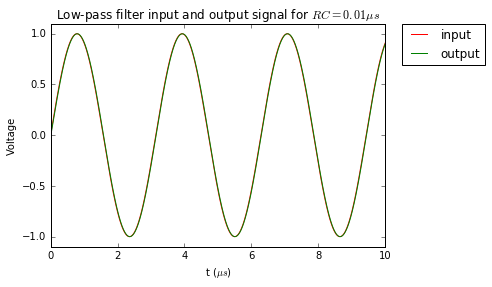

In [11]:
RC = 0.01 #sets value for RC
xpointsRK4 = RungeKutta4sine(Vout,tpoints) #calls the Runge-Kutta function for sine wave.

#creates an x and y array for input signal so that it can be plotted
t = np.linspace(0,10,1000)
Vin = np.sin(2*t)

plt.plot(t,Vin,'r-',label="input")
plt.plot(tpoints,xpointsRK4,'g-',label="output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("t ($\mu s$)")
plt.ylabel("Voltage")
plt.title("Low-pass filter input and output signal for $RC = 0.01 \mu s$")
plt.ylim(-1.1,1.1) #set higher y limits so graph is more clear

(-1.1, 1.1)

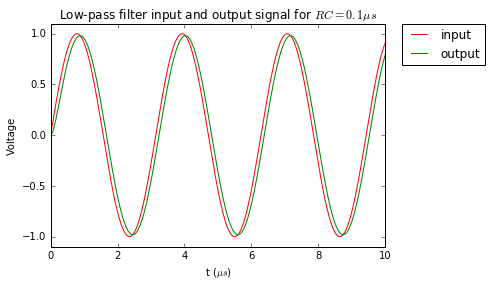

In [12]:
RC = 0.1 #sets value for RC
xpointsRK4 = RungeKutta4sine(Vout,tpoints) #calls the Runge-Kutta function for sine wave.

#creates an x and y array for input signal so that it can be plotted
t = np.linspace(0,10,1000)
Vin = np.sin(2*t)

plt.plot(t,Vin,'r-',label="input")
plt.plot(tpoints,xpointsRK4,'g-',label="output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("t ($\mu s$)")
plt.ylabel("Voltage")
plt.title("Low-pass filter input and output signal for $RC = 0.1 \mu s$")
plt.ylim(-1.1,1.1) #set higher y limits so graph is more clear

(-1.1, 1.1)

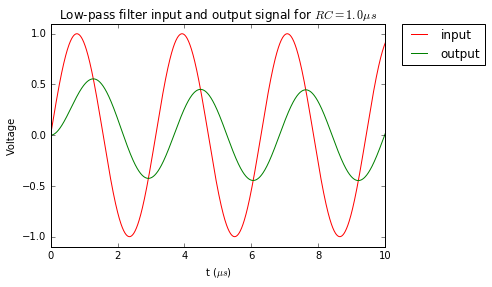

In [13]:
RC = 1.0 #sets value for RC
xpointsRK4 = RungeKutta4sine(Vout,tpoints) #calls the Runge-Kutta function for sine wave.

#creates an x and y array for input signal so that it can be plotted
t = np.linspace(0,10,1000)
Vin = np.sin(2*t)

plt.plot(t,Vin,'r-',label="input")
plt.plot(tpoints,xpointsRK4,'g-',label="output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("t ($\mu s$)")
plt.ylabel("Voltage")
plt.title("Low-pass filter input and output signal for $RC = 1.0 \mu s$")
plt.ylim(-1.1,1.1) #set higher y limits so graph is more clear

For the sine-waves you can see a similar result in terms of amplitude decreasing as RC increases but note that the sine-waves maximum amplitude at RC = 1.0 is slightly higher than the amplitude for the square wave at RC = 1.0. This suggests that a sine wave input is not attenuated as strongly.

Also note that although the sine-wave output keeps its shape (unlike the square-wave) it does seem to have a phase-change. This may be due to some sort of "lag" in the filter due to the charging time of the capacitor.

END CODE